<a href="https://colab.research.google.com/github/rita-milani/data_science_na_pratica/blob/master/LinearRegressionHousing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Housing Value Estimate with Simple Linear Regression**

After learning how to clean data, adjust the dataset, perform exploratory data analysis and plot the information in Python, we are ready to enter a new section, **Machine Learning**. To begin with, we will use a **Simple Linear Regression** model to estimate **housing value** using the library **scikit-learn**.

The dataset can be obtained [here](https://raw.githubusercontent.com/carlosfab/data_science/master/datasets/housing.csv), and it contains information about median housing prices for different neighbourhoods in the state of California, together with data about location, physical attributes like number of rooms, region population and median income by region. We will perform a quick exploratory analysis and then select a variable to perform the regression.

<center><img src='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSIP5rXv0IutBvPM9sEGo8v74QKN726HYfy5LY9EBRbydUE5pfv&usqp=CAU'> </center>

In [0]:
# import the libraries
# importar os pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style()

In [0]:
# import dataset
# importar a base de dados
path = "https://raw.githubusercontent.com/carlosfab/data_science/master/datasets/housing.csv"
df = pd.read_csv(path)

In [76]:
# check the first 5 entries
# checar as 5 primeiras entradas
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


**Variables Dictionary**
- `longitude` - longitude of the property, in degrees
- `latitude` - latitude of the property, in degrees
- `housing_median_age`- housing median age for the region, in years 
- `total_rooms` - total amount of rooms in the region
- `total_bedrooms` - total amount of bedrooms in the region
- `population` - total population of the region
- `households` - amount of households in the region
- `median_income` - median income of home owners in the region, yearly, in USD
- `median_house_value` - median property value for the region, in USD
- `ocean_proximity` - distance from the property to the ocean, categorical variable

**What is the size of the dataset?**

In [77]:
# check dataset shape
# checar formato da base de dados
df.shape

(20640, 10)

The dataset has 20640 rows or entries, and 10 columns or features.

**Which are the listed features?**


In [78]:
# list the columns 
# listar as colunas
df.columns.unique()

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

**Which are the values assumed by categorical variable `ocean_proximity`?**

In [79]:
# enlist ocean_proximity categorical values
# listar os valores assumidos pela variável ocean_proximity
df.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

**Which are the variable types?**

In [80]:
# variable types and missing values
# tipos de variáveis e valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


**Are there too many missing values in the series?**

Let´s check the integrity of the dataset using `.isnull()`.

In [81]:
# percentage of null values 
# percentual de valores nulos
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

total_bedrooms        0.010029
ocean_proximity       0.000000
median_house_value    0.000000
median_income         0.000000
households            0.000000
population            0.000000
total_rooms           0.000000
housing_median_age    0.000000
latitude              0.000000
longitude             0.000000
dtype: float64

**A quick statistical sum up:**

In [100]:
# statistical summary of the variables
# resumo estatístico das variáveis
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


From this table, we can extract some meaningful insights. For example, the minimum number of households is 1, and the minimum population is 3 for a given area. This can mean the neighbourhood is too small, or perhaps it lies on an island. The average of median house value is 206 thousand dollars, but the third quartile is not much higher than this, reaching 264 thousand dollars, so there must be a low amount of properties with values from this value to 500 thousand dolars. A similar situation happens to the median income, as 75% of the observations lie below 4.74 thousand dollars, however, the maximum amount reaches 15 thousand dollars.  

**Is the house value affected by the proximity to the ocean?**

We can easily assess this information by grouping it according to the ocean_proximity variable. 

In [83]:
# calculate median house value by ocean proximity
# calcular a mediana de preço do imóvel pela proximidade ao oceano
df.groupby(['ocean_proximity']).median_house_value.mean().sort_values(ascending=False)

ocean_proximity
ISLAND        380440.000000
NEAR BAY      259212.311790
NEAR OCEAN    249433.977427
<1H OCEAN     240084.285464
INLAND        124805.392001
Name: median_house_value, dtype: float64

So we can conclude that properties closer to the ocean have a higher median value, as properties in the Island region reach an average value of US$ 380 thousand, **more than triple** of average Inland house values. **Notice that we are not relating the price with other features, such as property age or number of rooms.** 

###**What about the correlation of variables?**

We want to understand if there is any relation among the listed variables. More precisely, we are interested in finding out the correlation among all the variables against `median_house_value`. One way of doing it is to build a **correlation matrix** using `.corr()` function and visualize it through a **Heatmap** built with **Seaborn** library. 


In [0]:
# generate a correlation matrix
# gerar a matriz de correlação
corr = df[['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']].corr()

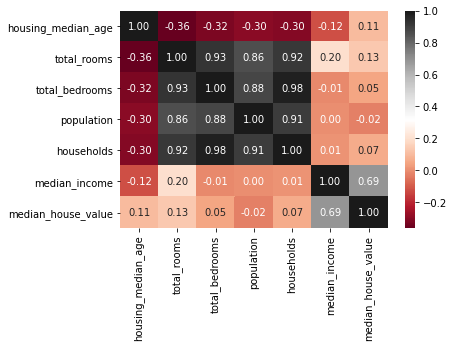

In [85]:
# generate a heatmap
# gerar um heatmap
sns.heatmap(corr, fmt='.2f', cmap='RdGy', annot=True, square=False, linecolor='white');

From the heatmap, we can see that there are relevant correlations, some of them very obvious. For example, the number of total_rooms is 93% correlated with the number of bedrooms, which makes sense, as the more bedrooms, the more rooms. Total rooms also have a high correlation with the population, so the bigger the population, the bigger the number of rooms. For our target variable, median house value, the chart shows a higher correlation with the median income (69%), so the higher the owner median income, the higher the house value. The other variables show no significant correlation with the house value, as we can see in the chart´s last line. 

###**Simple Linear Regression**
Now, we are going to perform a **Simple Linear Regression**. 

The name of the model is self explicative, meaning we are going to find the **linear equation** that best depicts the relation between **two variables, the dependent variable or target (y), or the variable we want to be able to explain and predict**, and the **independent, explicative or feature variable (x), which will help to explain the dependent variable**.

In our dataset, we want to find a model that best explains the `median_house_value`, that is our **dependent variable**. As we have many independent variables, we are going to choose the variable `median_income` to explain and predict the house value. 

To perform the linear regression, we will use **scikit-learn** library. The package comes already installed with Python, but in the case it doesn´t, it can be easily installed using `-pip` or `-conda`. It comes with tools to perform predictive data analysis, working with: 
- **classification**, or identifying a category an object belongs to
- **regression**, predicting continuous values
- **clustering**, grouping similar objects 
- **model selection**, comparing and choosing paramerters 
- **preprocessing**, transforming input data, like text, to be used with machine learning algorithms.

To perform the regression, we will need to:

**1.** Import scikit-learn packages 

**2.** Define the variables X and y

**3.** Split the data into train and test

**4.** Run the regression on train series to obtain the 

**5.** Predict y values using the test 

**6.** Check the model accuracy using pre-defined metrics

So, to begin with we will import the `scikit-learn library`, more specifically, the sub-packages that will allow us to split the series, run the regression and calculate the accuracy of the model. 


**1. Import scikit-learn library**





In [0]:
# import scikit-learn
#  importar o scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

**2. Determine X and y**

Here, we select the `median_income` as independent variable X, because it has the greatest correlation with the `median_house_value`, as noticed in previous section. 

In [0]:
# determine X and y... be careful with 1-feature (reshape)
# determinar X e y... atenção com o 1-feature (reshape)
X = df['median_income'].values.reshape(-1,1)
y = df['median_house_value']

**3. Split the data into train and test sets**

This part is necessary because we will have to train the model in one part of the dataset, the `train part`. If we run the model on the entire dataset, it will be **overfitted**, or too much adjusted to the dataset, but not for **out-of-the-sample** data. We want a model that is specific enough to explain the dependent variable, but generalized enough to be able to work with newly added data. 

The `test part`, the part that was not previously used in model training, will be used later, after the most fit model is chosen, to predict the data. Then, we can check the accuracy of the model to work with `out-of-the-sample`  by **comparing the predicted values with the effective values** from the test part.

The split default is 75% of the series assigned to train part, and 25% to the test part. The split is random, it means it will not split the first 75% of the series, but 75% of the data not in direct order. 

In [0]:
# divide the dataset into train and test
# dividir o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,y)

**4. Generate and train the Linear Regression Model**

This is the step where the regression will be run. To do so, we have to create a new variable in order to store the model. Here, we named it `rls`. Then, we use the `fit` function to calculate the model.

In [89]:
# generate and train the linear regression model
# criar e treinar o modelo de regressão linear
rls = LinearRegression()
rls.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Now that the model is calculated, we can print the `coefficient` and `intercept` of the simple linear regression.

In [90]:
# print the coefficients
# imprimir os coeficientes
print('Coefficient:\t {}'.format(rls.coef_))
print('Intercept:\t{}'.format(rls.intercept_))

Coefficient:	 [41632.73287001]
Intercept:	45558.50937107665


That means that our equation is:

`y_pred = 41632.73 * X + 45558.51`

Now, we can plot the scatter plot to see the relation between the variables and draw the regression line:

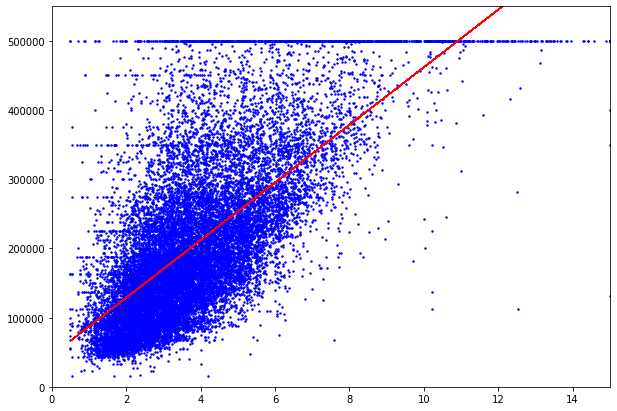

In [91]:
# plot the scatter plot
# plotar o gráfico de dispersão

fig, ax = plt.subplots(figsize=(10,7))

ax.scatter(X, y, s=2, color='b')
ax.plot(X, (rls.coef_*X + rls.intercept_), '-r', linewidth=1)
ax.set_xlim(0, 15)
ax.set_ylim(0, 550000)

plt.show()

**5. Predict the y using X-test**

To predict the y, we have to create a y_pred variable and apply the `.predict()` function to the X_test part.

In [0]:
# test the model
# testar o modelo
y_pred = rls.predict(X_test)

**6. Check the model accuracy**

As we have already imported the `skleanr metrics` libraries, we will apply the following metrics: 

- R2-Score
- Mean Absolute Error
- Mean Squared Error

In [93]:
# evaluate the model´s performance
# avaliar a performance do modelo
print('R2-Score:\t{}'.format(r2_score(y_test, y_pred)))
print('Mean Absolute Error:\t{}'.format(mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error:\t{}'.format(mean_squared_error(y_test, y_pred)))

R2-Score:	0.48422512952061925
Mean Absolute Error:	62588.884678385664
Mean Squared Error:	6986998033.836098


Our R2 Score is below 0.50, which indicates a low goodness of fit of the model, so the predicted values will be somewhat far from the real values, and the predictions will not be so accurate. It is possible to observe that the points are more dispersed compared to the regression line.

We have also the figures for MAE and MSE, but as we have only one simulation, it is not possible to compare if they are the most accurate.

Now, let´s plot the predicted and effective y values:

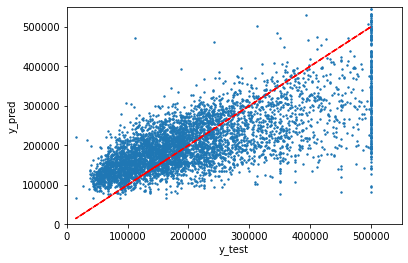

In [96]:
# plot the predicted and real y
# plotar o y real e o projetado

fig, ax = plt.subplots()

ax.scatter(y_test, y_pred, s=2)
ax.plot(y_test, y_test, '--r')
ax.set_xlabel('y_test')
ax.set_ylabel('y_pred')
ax.set_xlim(0, 550000)
ax.set_ylim(0, 550000)

plt.show()

As we have already seen for R2 Score, the scatter plot shows that there the predicted values are not very close to the actual ones. A **high R2-Score** would be depicted by points concentrated on the red **45 degree line**, with low or no dispersion. We have data more concentrated on the first 100 thousand dollars, meaning a higher accuracy for this range, that is reduced as the value increases. 

###**Housing Value Forecast**
After all the analysis and regression exercise, we get to the desired point. We did all of the previous tasks to be able to predict a random property value based on the income of the owner. Remember we are talking about average values here. 

So what would be the estimated house price for an owner with US$ 15 thousand yearly income?

In [97]:
# predict the property value for a median income of US$15k
# estimar o valor da propriedade para uma renda média de US$ 15 mil
y_15 = rls.coef_*15 + rls.intercept_
print('The estimated house value for an US$ 15k income is {}:'.format(y_15))

The estimated house value for an US$ 15k income is [670049.50242125]:


That means that, for a US$15 thousand average income, the house value will be over 670 thousand dollars.

**Conclusion**

We used our first tool in `scikit-learn` to develop a **Machine Learning** exercise, namely, a Simple Linear Regression. The first part of this exercise used previously learned tools from `pandas` and `matplotlib` in order to organize the dataset, analyze the data and plot the values. We went through the characteristics of the dataset, analyzed basic statistical features, established the correlation among the variables, and so on. 

On the following part, we started the **Simple Regression Analysis** using **scikit-learn** library, giving a brief explanation of the steps to perform it.  We determined the variables, decomposed the series into **train and test** series, performed the regression and predicted some values, apart from calculating the model accuracy. 